In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from Simple_ESN import *
from IPython.display import display, clear_output

def train(self,train_x,train_y):
  c_state = self.compute_state
  s = np.array( list( map( c_state, train_x ) ) ) # shape(len(data),Nr,1)
  s = s.reshape( np.size(train_x), self.Nr ) # shape(len(data),Nr)
  d = train_y.T #shape(len(data),Ny)
  self.Wout = np.transpose( np.dot( np.linalg.pinv(s) , d ) )

def MC(esn,data):
  for d in data[:1000]:
    esn.compute_state(d) # washout

  c_out = esn.compute_output # funzione che calcola output
  m = np.array( list( map(c_out,data[1000:]) ) ).reshape(1000,esn.Ny) # matrice degli yk: uno per colonna

  v1 = np.var(data[1000-2*esn.Ny:])
  MC =(np.cov(m[:,0] , data[1000:])[0,0])**2 / (v1 * np.var(m[:,0])) + sum( (np.cov( m[:,k] , data[1000-k:-k])[0,0])**2 / ( v1 * np.var(m[:,k])) for k in range(1,esn.Ny) )
  return MC


In [ ]:
train_data = 0.5*(2*np.random.rand(5000)-1)
test_data = 0.5*(2*np.random.rand(2000)-1)

def eval(tresh=0.0001 , max_epochs = 1000 , step=1e-05 , train_fun=train_input , r_density=0.2 , i_density=0.1 , Nr=100, Nu=1 , mesure_interval=50, rho=0.9):
  test_MCs = [] ; train_MCs = [] 
  train_dims = [] ; test_dims = []

  esn = ESN( Nu=Nu, Nr=Nr, Ny=2*Nr , rho=rho , r_density=r_density , i_density=i_density )
  rhos = np.array( max(np.abs(np.linalg.eigvals(esn.W))) )

  train_x = train_data[1000:5000]
  train_y = np.vstack( list( train_data[1000-k:5000-k] for k in range(esn.Ny) ) )

  for d in train_data[:1000]:
    esn.compute_state(d) # washout
  train(esn,train_x,train_y) 

  test_MCs.append( MC(esn,test_data) ) ; train_MCs.append( MC(esn,train_data[:2000]) )
  train_dims.append( DSS(esn,train_data) ) ; test_dims.append( DSS(esn,test_data) )

  for epoch in range(max_epochs):

    train_fun(esn,train_data,step) 

    if epoch % mesure_interval == 0:
      clear_output()
      for d in train_data[:1000]:
        esn.compute_state(d) # washout
      train(esn,train_x,train_y) 

      test_MCs.append( MC(esn,test_data) ) ; train_MCs.append( MC(esn,train_data[:2000]) )
      train_dims.append( DSS(esn,train_data) ) ; test_dims.append( DSS(esn,test_data) )
      rhos = np.vstack( ( rhos, max(np.abs(np.linalg.eigvals(esn.W))) ) )
      print('epoch: ',epoch)
    # end if

  # end for

  fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(7,9))
  ax1.set_ylabel('MC') ; ax1.set_xlabel('epoche x ' + str(mesure_interval)) ; ax1.title.set_text('Memory capacity'); 
  ax2.set_ylabel('DSS') ; ax2.set_xlabel('epoche x ' + str(mesure_interval)) ; ax2.title.set_text('Dimensione spazio stati')
  ax1.plot(train_MCs,'b');ax1.plot(test_MCs,'r') ; ax1.legend(['MC train', 'MC val'], loc=4)
  ax2.plot(train_dims,'b');ax2.plot(test_dims,'r') ; ax2.legend(['dim train', 'dim val'], loc=4)
  ax3.set_ylabel('rho') ; ax3.title.set_text('raggio spettrale primo reservoir')
  ax3.plot( rhos[:,0],'-r')
  fig.tight_layout()

  print("step: ",step,' mesure_interval: ',mesure_interval, ' stop-treshold: ',tresh, '\n'  )
  print("r_density: ",esn.r_density, 'i_density:',esn.i_density, ' Nr: ',esn.Nr, ' rho: ',esn.rho, '\n'  )
  print("norma pesi in alla fine: ", np.linalg.norm(esn.W_in))
  print("norma pesi rec alla fine: ", np.linalg.norm(esn.W))
  print("raggio spettrale matrice ricorrente alla fine: ",max(np.abs(np.linalg.eigvals(esn.W))) ,'\n' )



epoch:  199
step:  [1e-05, -1e-05]  mesure_interval:  1  stop-treshold:  0.0001 

r_density:  0.2 i_density: 0.1  Nr:  100  rho:  0.9 

norma pesi in alla fine:  2.2068280328889633
norma pesi rec alla fine:  718.1096094112311
raggio spettrale matrice ricorrente alla fine:  15.458255761119771 



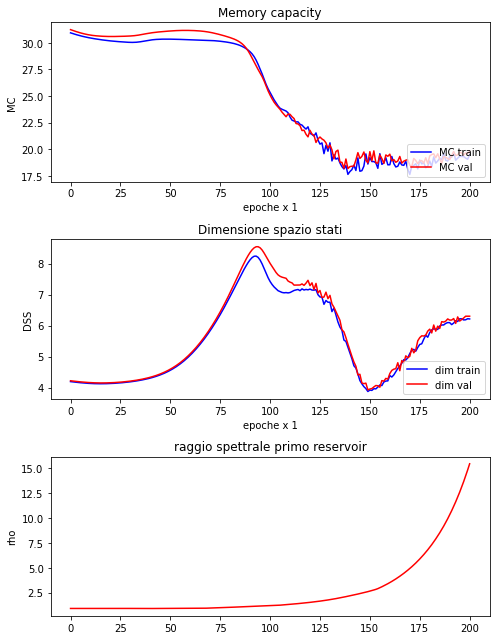

In [ ]:
eval( max_epochs = 200 , step=[1e-05,-1e-05] , train_fun=train_both , r_density=0.2 , i_density=0.1 , Nr=100, mesure_interval=1, rho=0.9)

epoch:  199
step:  [1e-05, -1e-05]  mesure_interval:  1  stop-treshold:  0.0001 

r_density:  0.8 i_density: 1  Nr:  100  rho:  0.9 

norma pesi in alla fine:  3.7745952709501815
norma pesi rec alla fine:  139.25366630615187
raggio spettrale matrice ricorrente alla fine:  11.06187118748154 



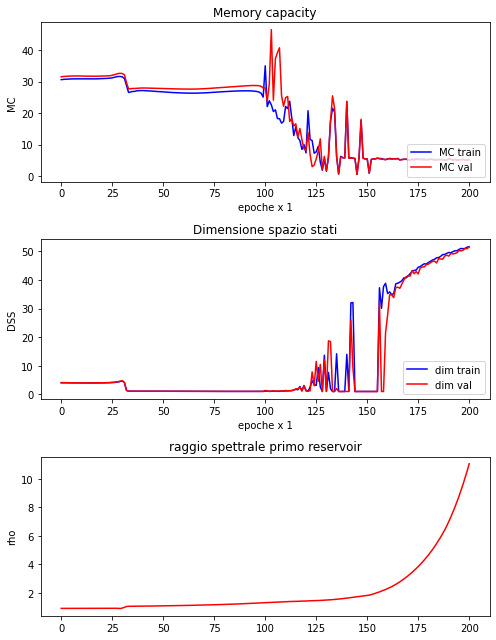

In [ ]:
seval( max_epochs = 200 , step=[1e-05,-1e-05] , train_fun=train_both , r_density=0.8 , i_density=1 , Nr=100, mesure_interval=1, rho=0.9)

epoch:  249
step:  [1e-05, -1e-05]  mesure_interval:  1  stop-treshold:  0.0001 

r_density:  0.8 i_density: 1  Nr:  100  rho:  0.9 

norma pesi in alla fine:  2.8759517892697626
norma pesi rec alla fine:  1749.4546741687377
raggio spettrale matrice ricorrente alla fine:  118.79712155685665 



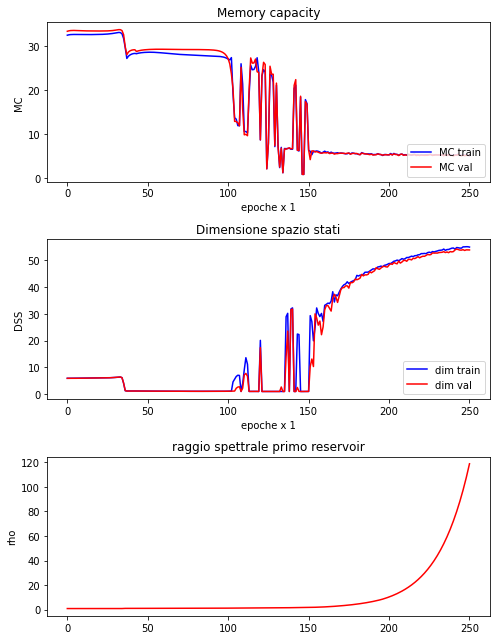

In [ ]:
eval( max_epochs = 250 , step=[1e-05,-1e-05] , train_fun=train_both , r_density=0.8 , i_density=1 , Nr=100, mesure_interval=1, rho=0.9)

epoch:  399
step:  [1e-05, -1e-05]  mesure_interval:  1  stop-treshold:  0.0001 

r_density:  0.8 i_density: 1  Nr:  100  rho:  0.1 

norma pesi in alla fine:  1.965653230443358
norma pesi rec alla fine:  4229.086489480065
raggio spettrale matrice ricorrente alla fine:  377.18839936865925 



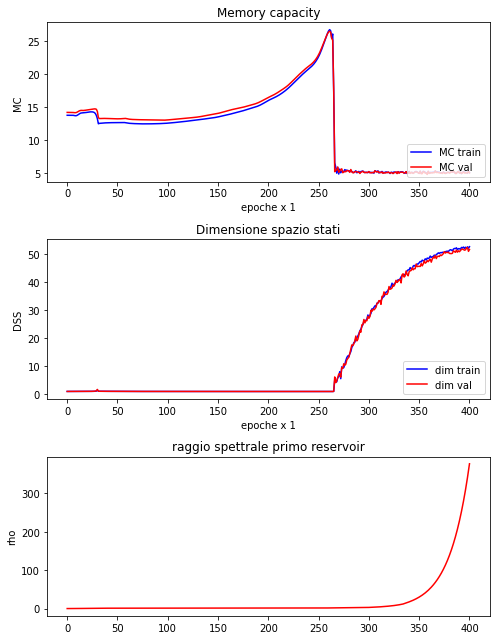

In [ ]:
eval( max_epochs = 400 , step=[1e-05,-1e-05] , train_fun=train_both , r_density=0.8 , i_density=1 , Nr=100, mesure_interval=1, rho=0.1)

epoch:  79
step:  [1e-05, -1e-05]  mesure_interval:  1  stop-treshold:  0.0001 

r_density:  0.8 i_density: 1  Nr:  100  rho:  0.9 

norma pesi in alla fine:  5.422488463367123
norma pesi rec alla fine:  10.525414386123325
raggio spettrale matrice ricorrente alla fine:  1.1450112229305425 



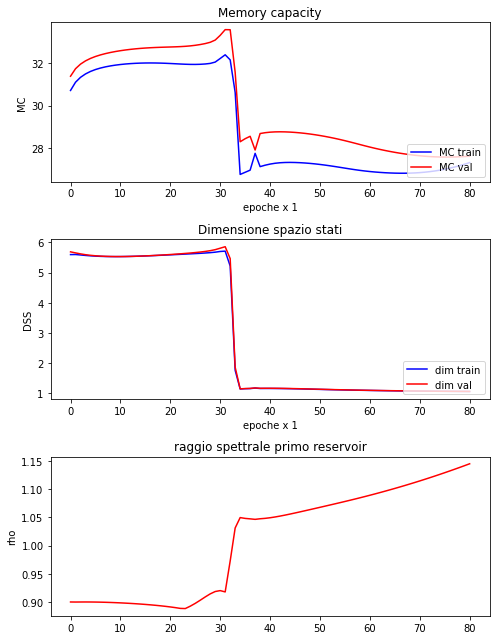

In [ ]:
eval( max_epochs = 80 , step=[1e-05,-1e-05] , train_fun=train_both , r_density=0.8 , i_density=1 , Nr=100, mesure_interval=1, rho=0.9)

epoch:  299
step:  [1e-05, -1e-05]  mesure_interval:  1  stop-treshold:  0.0001 

r_density:  0.8 i_density: 1  Nr:  100  rho:  0.1 

norma pesi in alla fine:  6.881305720434755
norma pesi rec alla fine:  39.664545719961914
raggio spettrale matrice ricorrente alla fine:  3.013141558458048 



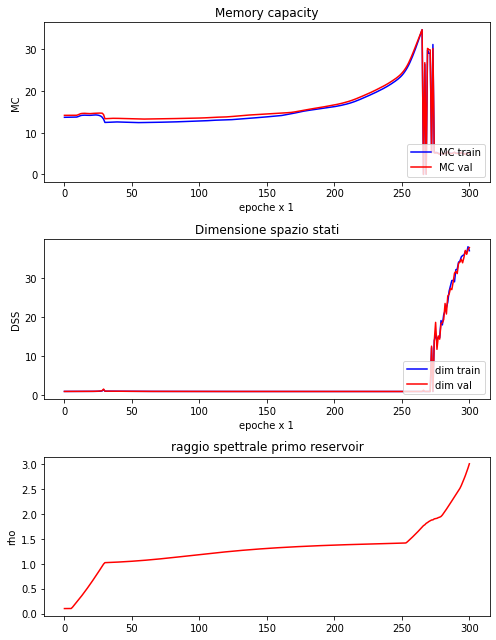

In [ ]:
eval( max_epochs = 300 , step=[1e-05,-1e-05] , train_fun=train_both , r_density=0.8 , i_density=1 , Nr=100, mesure_interval=1, rho=0.1)

epoch:  299
step:  [1e-05, -1e-05]  mesure_interval:  1  stop-treshold:  0.0001 

r_density:  0.8 i_density: 1  Nr:  100  rho:  0.1 

norma pesi in alla fine:  7.740878955155383
norma pesi rec alla fine:  38.49944140254582
raggio spettrale matrice ricorrente alla fine:  2.9904839486467676 



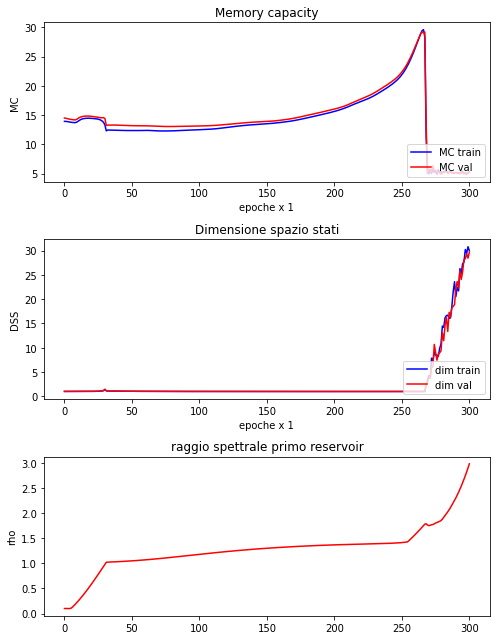

In [ ]:
eval( max_epochs = 300 , step=[1e-05,-1e-05] , train_fun=train_both , r_density=0.8 , i_density=1 , Nr=100, mesure_interval=1, rho=0.1)

epoch:  199
step:  1e-05  mesure_interval:  1  stop-treshold:  0.0001 

r_density:  0.2 i_density: 0.1  Nr:  100  rho:  0.9 

norma pesi in alla fine:  3.1140089078266717
norma pesi rec alla fine:  8.199275903197893
raggio spettrale matrice ricorrente alla fine:  0.8999999999999934 



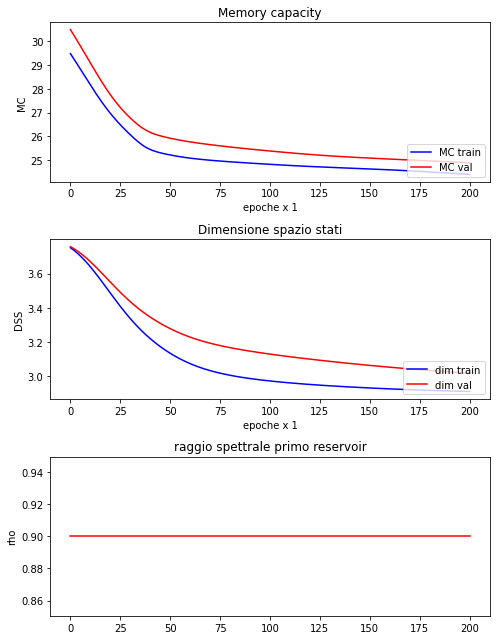

In [ ]:
eval( max_epochs = 200 , step=1e-05 , train_fun=train_input , r_density=0.2 , i_density=0.1 , Nr=100, mesure_interval=1)

epoch:  3490
step:  -1e-05  mesure_interval:  10  stop-treshold:  0.0001 

r_density:  0.2 i_density: 0.1  Nr:  100  rho:  0.9 

norma pesi in alla fine:  3.242062572288312e-07
norma pesi rec alla fine:  7.396769633780719
raggio spettrale matrice ricorrente alla fine:  0.9000000000000005 



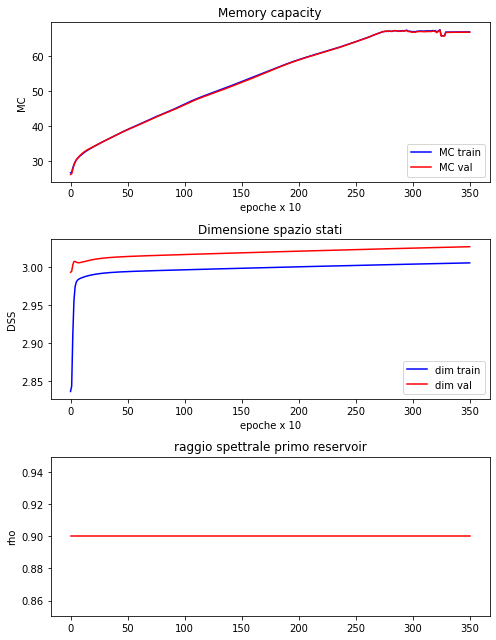

In [ ]:
eval( max_epochs = 3500 , step=-1e-05 , train_fun=train_input , r_density=0.2 , i_density=0.1 , Nr=100, mesure_interval=10)

epoch:  2990
step:  -1e-05  mesure_interval:  10  stop-treshold:  0.0001 

r_density:  0.1 i_density: 0.8  Nr:  100  rho:  0.9 

norma pesi in alla fine:  1.0
norma pesi rec alla fine:  8.060287607327339e+40
raggio spettrale matrice ricorrente alla fine:  9.45489047910394e+33 



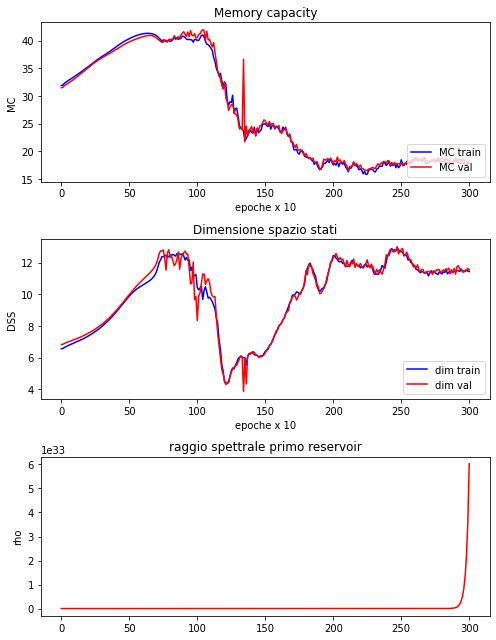

In [ ]:
eval( max_epochs = 3000 , step=-1e-05 , train_fun=train_rec , r_density=0.1 , i_density=0.8 , Nr=100, mesure_interval=10)

epoch:  2990
step:  -1e-05  mesure_interval:  10  stop-treshold:  0.0001 

r_density:  0.1 i_density: 0.8  Nr:  100  rho:  0.9 

norma pesi in alla fine:  1.0
norma pesi rec alla fine:  1.5148485176666748e+42
raggio spettrale matrice ricorrente alla fine:  2.204391751652239e+37 



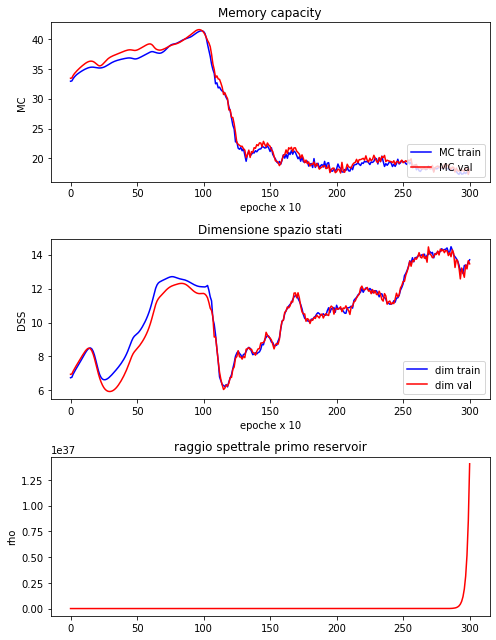

In [ ]:
eval( max_epochs = 3000 , step=-1e-05 , train_fun=train_rec , r_density=0.1 , i_density=0.8 , Nr=100, mesure_interval=10)

epoch:  2990
step:  -1e-05  mesure_interval:  10  stop-treshold:  0.0001 

r_density:  0.1 i_density: 0.8  Nr:  100  rho:  0.9 

norma pesi in alla fine:  1.0
norma pesi rec alla fine:  2.4851021420065763e+46
raggio spettrale matrice ricorrente alla fine:  4.2976162367056735e+42 



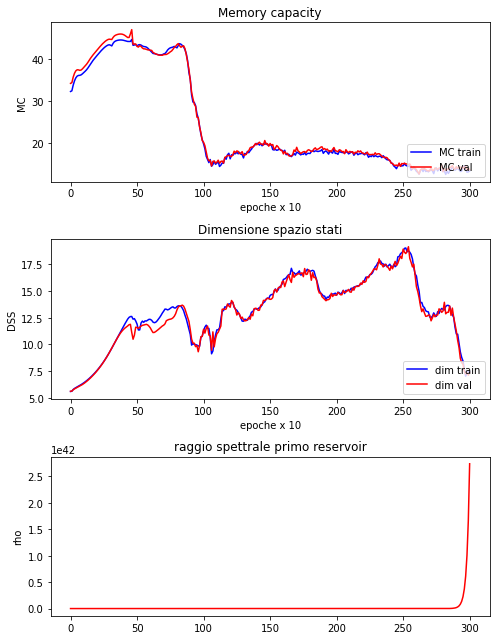

In [ ]:
eval( max_epochs = 3000 , step=-1e-05 , train_fun=train_rec , r_density=0.1 , i_density=0.8 , Nr=100, mesure_interval=10)

epoch:  2990
step:  -1e-05  mesure_interval:  10  stop-treshold:  0.0001 

r_density:  0.1 i_density: 0.8  Nr:  100  rho:  0.9 

norma pesi in alla fine:  0.9999999999999999
norma pesi rec alla fine:  4.780701363657315e+38
raggio spettrale matrice ricorrente alla fine:  1.8955508643604167e+34 



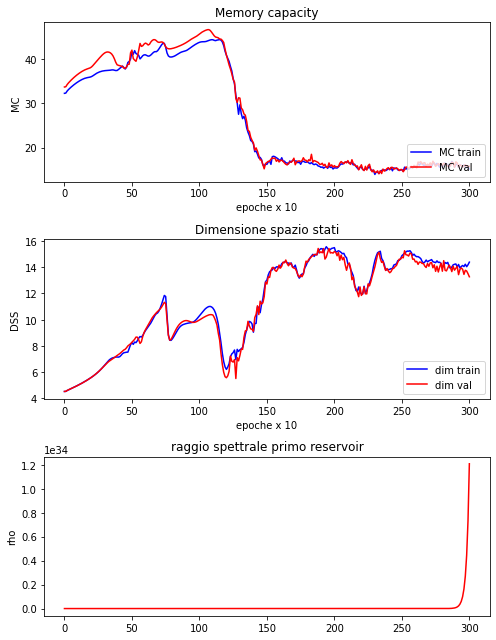

In [ ]:
eval( max_epochs = 3000 , step=-1e-05 , train_fun=train_rec , r_density=0.1 , i_density=0.8 , Nr=100, mesure_interval=10)

epoch:  1990
step:  -1e-05  mesure_interval:  10  stop-treshold:  0.0001 

r_density:  0.1 i_density: 1  Nr:  100  rho:  0.9 

norma pesi in alla fine:  1.0
norma pesi rec alla fine:  17420391068124.89
raggio spettrale matrice ricorrente alla fine:  77686257.51122081 



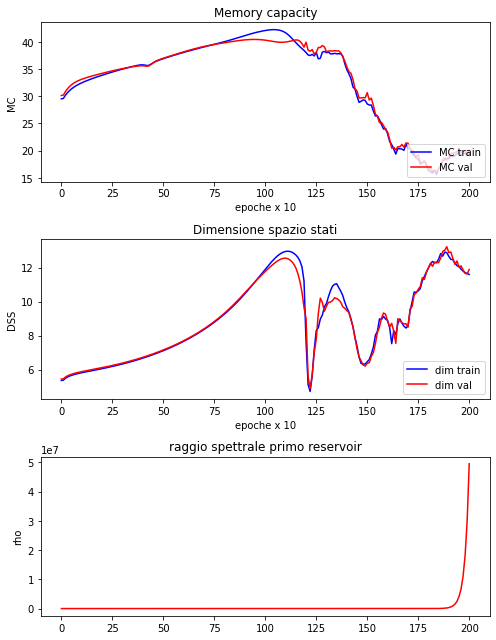

In [ ]:
eval( max_epochs = 2000 , step=-1e-05 , train_fun=train_rec , r_density=0.1 , i_density=1 , Nr=100, mesure_interval=10)

epoch:  1990
step:  -1e-05  mesure_interval:  10  stop-treshold:  0.0001 

r_density:  0.1 i_density: 0.8  Nr:  100  rho:  0.9 

norma pesi in alla fine:  1.0
norma pesi rec alla fine:  1.59047884763261e+22
raggio spettrale matrice ricorrente alla fine:  6.257603249697272e+17 



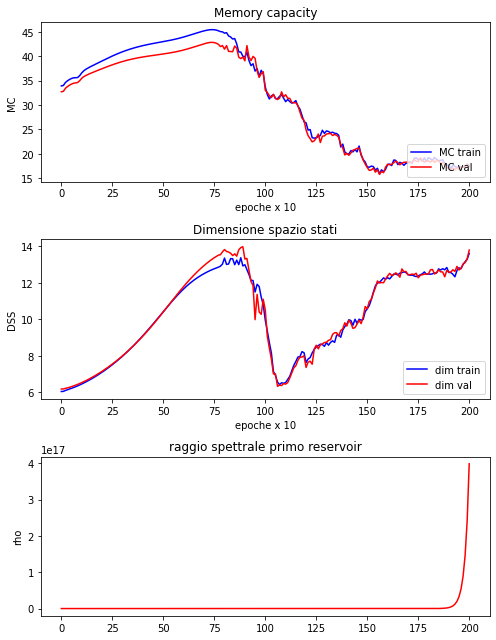

In [ ]:
eval( max_epochs = 2000 , step=-1e-05 , train_fun=train_rec , r_density=0.1 , i_density=0.8 , Nr=100, mesure_interval=10)

epoch:  1990
step:  -1e-05  mesure_interval:  10  stop-treshold:  0.0001 

r_density:  0.1 i_density: 0.5  Nr:  100  rho:  0.9 

norma pesi in alla fine:  1.0
norma pesi rec alla fine:  3.064551629266539e+21
raggio spettrale matrice ricorrente alla fine:  2616061517518.718 



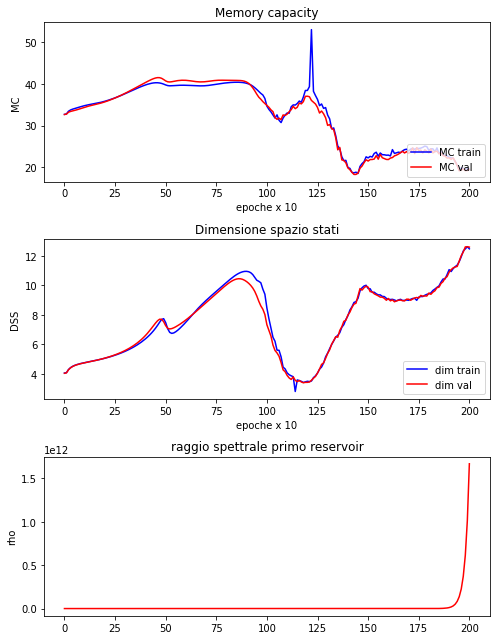

In [ ]:
eval( max_epochs = 2000 , step=-1e-05 , train_fun=train_rec , r_density=0.1 , i_density=0.5 , Nr=100, mesure_interval=10)

epoch:  1990
step:  -1e-05  mesure_interval:  10  stop-treshold:  0.0001 

r_density:  0.1 i_density: 0.2  Nr:  100  rho:  0.9 

norma pesi in alla fine:  1.0
norma pesi rec alla fine:  2.197480525803144e+30
raggio spettrale matrice ricorrente alla fine:  1.897649328322022e+26 



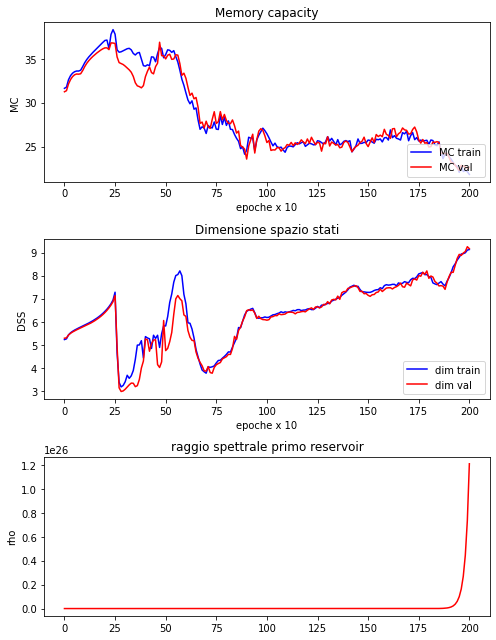

In [ ]:
eval( max_epochs = 2000 , step=-1e-05 , train_fun=train_rec , r_density=0.1 , i_density=0.2 , Nr=100, mesure_interval=10)

epoch:  190
step:  1e-05  mesure_interval:  10  stop-treshold:  0.0001 

r_density:  0.1 i_density: 0.8  Nr:  100  rho:  0.9 

norma pesi in alla fine:  0.9999999999999999
norma pesi rec alla fine:  31.606513832396875
raggio spettrale matrice ricorrente alla fine:  9.998004899154452 



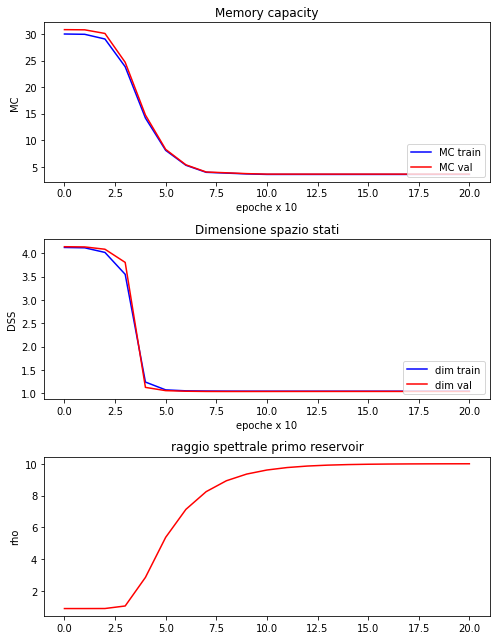

In [ ]:
eval( max_epochs = 200 , step=1e-05 , train_fun=train_rec , r_density=0.1 , i_density=0.8 , Nr=100, mesure_interval=10)

epoch:  2990
step:  -1e-05  mesure_interval:  10  stop-treshold:  0.0001 

r_density:  0.1 i_density: 0.8  Nr:  100  rho:  0.1 

norma pesi in alla fine:  1.0
norma pesi rec alla fine:  5.273912397688513
raggio spettrale matrice ricorrente alla fine:  1.0030399565482429 



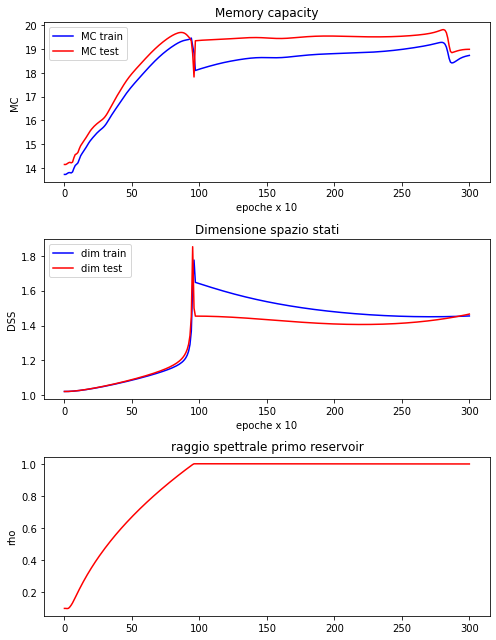

In [ ]:
eval( max_epochs = 3000 , step=-1e-05 , train_fun=train_rec , r_density=0.1 , i_density=0.8 , Nr=100, mesure_interval=10, rho=0.1)

epoch:  1490
step:  -1e-05  mesure_interval:  10  stop-treshold:  0.0001 

r_density:  0.2 i_density: 0.8  Nr:  100  rho:  0.1 

norma pesi in alla fine:  0.9999999999999998
norma pesi rec alla fine:  2.8848203209704475
raggio spettrale matrice ricorrente alla fine:  1.0032339087264663 



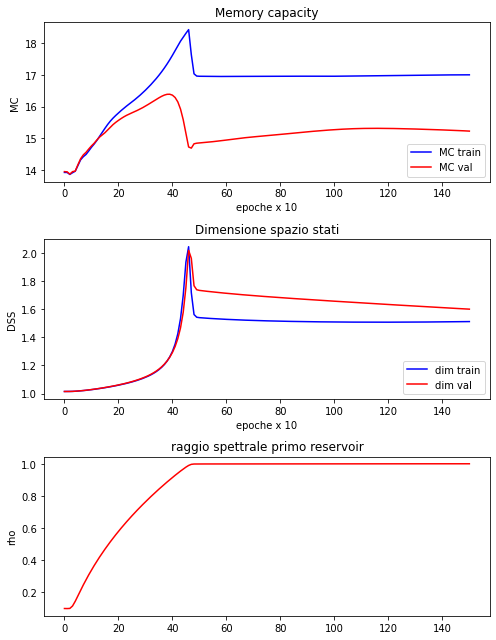

In [ ]:
eval( max_epochs = 1500 , step=-1e-05 , train_fun=train_rec , r_density=0.2 , i_density=0.8 , Nr=100, mesure_interval=10, rho=0.1)

epoch:  1490
step:  -1e-05  mesure_interval:  10  stop-treshold:  0.0001 

r_density:  0.5 i_density: 0.8  Nr:  100  rho:  0.1 

norma pesi in alla fine:  1.0
norma pesi rec alla fine:  1.9767889849345404
raggio spettrale matrice ricorrente alla fine:  1.0036975355189128 



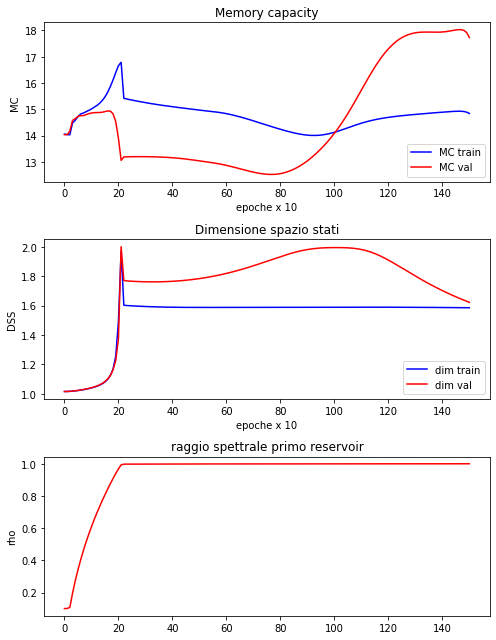

In [ ]:
eval( max_epochs = 1500 , step=-1e-05 , train_fun=train_rec , r_density=0.5 , i_density=0.8 , Nr=100, mesure_interval=10, rho=0.1)

epoch:  1490
step:  -1e-05  mesure_interval:  10  stop-treshold:  0.0001 

r_density:  0.8 i_density: 0.8  Nr:  100  rho:  0.1 

norma pesi in alla fine:  1.0
norma pesi rec alla fine:  1.7288502243178678
raggio spettrale matrice ricorrente alla fine:  1.0042170279082667 



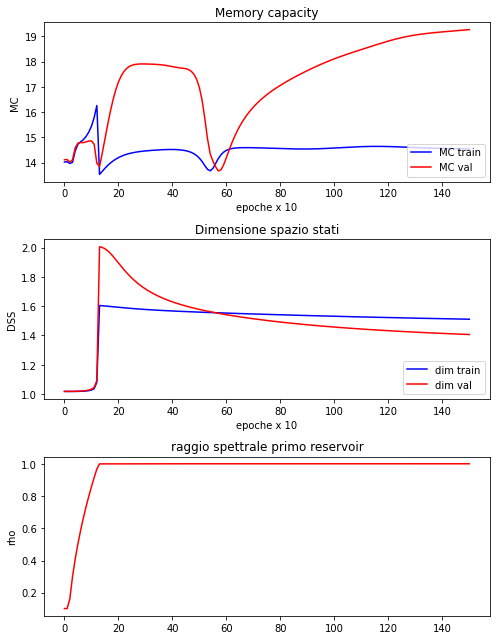

In [ ]:
eval( max_epochs = 1500 , step=-1e-05 , train_fun=train_rec , r_density=0.8 , i_density=0.8 , Nr=100, mesure_interval=10, rho=0.1)

epoch:  199
step:  [-1e-05, -1e-05]  mesure_interval:  1  stop-treshold:  0.0001 

r_density:  0.8 i_density: 1  Nr:  100  rho:  0.9 

norma pesi in alla fine:  0.3273544238755074
norma pesi rec alla fine:  8.942422667310261
raggio spettrale matrice ricorrente alla fine:  0.9095128237579525 



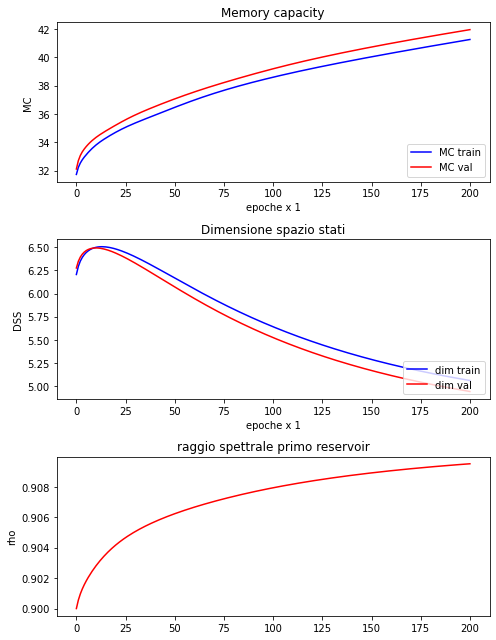

In [ ]:
eval( max_epochs = 200 , step=[-1e-05,-1e-05] , train_fun=train_both , r_density=0.8 , i_density=1 , Nr=100, mesure_interval=1, rho=0.9)